In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd 

#constants 
mZ0 = 91.1880 #GeV/c2
mZ0_unc = 0.0020 #GeV/c2
mW = 80.3692 #GeV/c2
mW_unc = 0.0133 #GeV/c2
mH = 125.20 #GeV/c2
mH_unc = 0.11 #GeV/c2
me = 0.51099895000 #MeV/c2
me_unc = 0.00000000015 #MeV/c2
mμ = 105.6583755 #MeV/c2
mμ_unc = 0.0000023 #MeV/c2
mτ = 1776.93 #MeV/c2
mτ_unc = 0.09 #MeV/c2

## 1: The Invariant Mass Distribution

In [4]:
#1 loading the data
data=np.genfromtxt("atlas_data.csv",  delimiter = ',', 
                       skip_header=1)

pt1 = data[:,0]
pt2 = data[:,1]
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]

In [5]:
#2 calculating mass for each leopton pair

#calculating vector componenets
px1 = pt1*np.cos(phi1)
px2 = pt2*np.cos(phi2)

py1 = pt1*np.sin(phi1)
py2 = pt2*np.sin(phi2)

pz1 = pt1*np.sinh(eta1)
pz2 = pt2*np.sinh(eta2)

#calculating summed momenta components
px_tot = px1+px2

py_tot = py1+py2

pz_tot = pz1+pz2

E_tot = E1+E2

#calculating mass
m = np.sqrt(E_tot**2 - (px_tot**2+py_tot**2+pz_tot**2))

Text(0.5, 1.0, 'Histogram of the Mass Distribution of the Lepton Pairs')

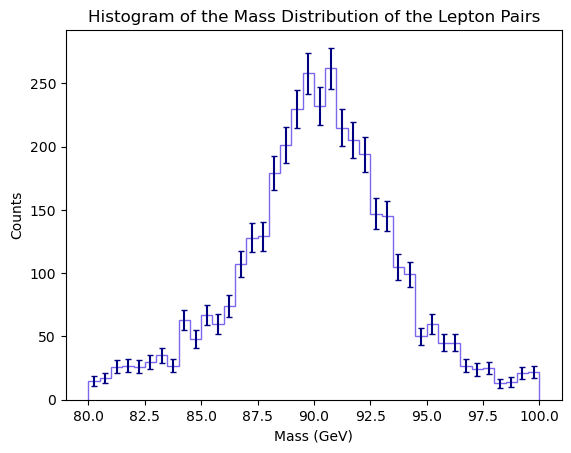

In [6]:
#3 making a histogram 
bins = np.linspace(80,100,41)

fig, ax = plt.subplots(1,1)
yvals, bin_edge, other = ax.hist(m, bins = bins, color='mediumslateblue', histtype='step');

bin_center = 0.5*(bin_edge[1:] + bin_edge[:-1]) #used to position the errorbars
errors = np.sqrt(yvals)
ax.errorbar(bin_center, yvals, errors, fmt='none', capsize=2, color = 'navy')
ax.set_xlabel('Mass (GeV)')
ax.set_ylabel('Counts')
ax.set_title('Histogram of the Mass Distribution of the Lepton Pairs')

## 2: Breit-Wigner Fit

In [7]:
#1 creating a function that describes the decay distribution
def decay_dist(m,m0,Gamma):
    return (5000/2)*(1/np.pi)*((Gamma/2)/((m-m0)**2+(Gamma/2)**2))

In [8]:
#2
#solving the function to create a fit
par, pcov = scipy.optimize.curve_fit(decay_dist, bin_center, yvals)
m0, Gamma = par
fit = decay_dist(bin_center, m0, Gamma)

#creating a mask to plot the fit from 87-93
mask = (bin_center >= 87) & (bin_center <=93)
bin_center_cut = bin_center[mask]
fit_cut = fit[mask]

Text(0.5, 1.0, 'Residuals of the Mass Distribution Compared to the Fit')

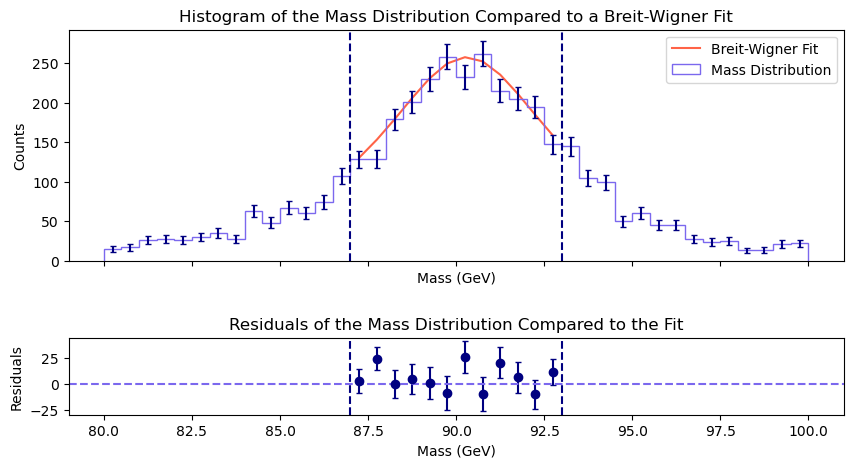

In [9]:
#3
#creating a shared axis
fig2, (ax_top, ax_bot) = plt.subplots(
    2,1, sharex=True, figsize=(10,5),
    gridspec_kw={'height_ratios':[3,1],'hspace':0.5})

#adding fit to plot
ax_top.plot(bin_center_cut, fit_cut, color = 'tomato', label = 'Breit-Wigner Fit')

#replotting old histogram
yvals, bin_edge, other = ax_top.hist(m, bins = bins, histtype = 'step', color='mediumslateblue', label ='Mass Distribution')
ax_top.errorbar(bin_center, yvals, errors, fmt='none', capsize=2, color = 'navy')
ax_top.axvline(87, color='navy', ls='--')
ax_top.axvline(93, color='navy', ls='--')
ax_top.set_xlabel('Mass (GeV)')
ax_top.set_ylabel('Counts')
ax_top.set_title('Histogram of the Mass Distribution Compared to a Breit-Wigner Fit')
ax_top.legend()

#calculating residuals
yvals_cut = yvals[mask]
residuals = fit_cut - yvals_cut

#plotting residuals
errors_cut = errors[mask]
ax_bot.errorbar(bin_center_cut, residuals, yerr=errors_cut, fmt='o', color="navy", capsize = 2)
ax_bot.axhline(0,color="mediumslateblue", ls='--')
ax_bot.axvline(87, color='navy', ls='--')
ax_bot.axvline(93, color='navy', ls='--')
ax_bot.set_xlabel('Mass (GeV)')
ax_bot.set_ylabel('Residuals')
ax_bot.set_title('Residuals of the Mass Distribution Compared to the Fit')

In [49]:
#4 
chisq = np.sum((residuals/yvals_cut)**2)
dof = len(bin_center_cut) - 2    # degrees of freedom for fit 
red_chisq = chisq/dof
print("chisq = ",chisq, ", reduced chisq =",red_chisq,)
p_value = scipy.stats.distributions.chi2.sf(chisq, dof)
print("p value =", p_value)

chisq =  0.06844129787721923 , reduced chisq = 0.006844129787721922
p value = 0.9999999996199155
10


In [18]:
#5. 
m0 = par[0] 
Gamma = par[1] #intercept
unc_matrix = np.sqrt(np.diag(pcov))
m0_unc = unc_matrix[0]
G_unc = unc_matrix[1]
print(f"m0 = {m0} +- {m0_unc}")
print(f"Gamma = {Gamma} +- {G_unc}")

m0 = 90.30104653340945 +- 0.07681899780459708
Gamma = 6.182375062640274 +- 0.15469888962927042


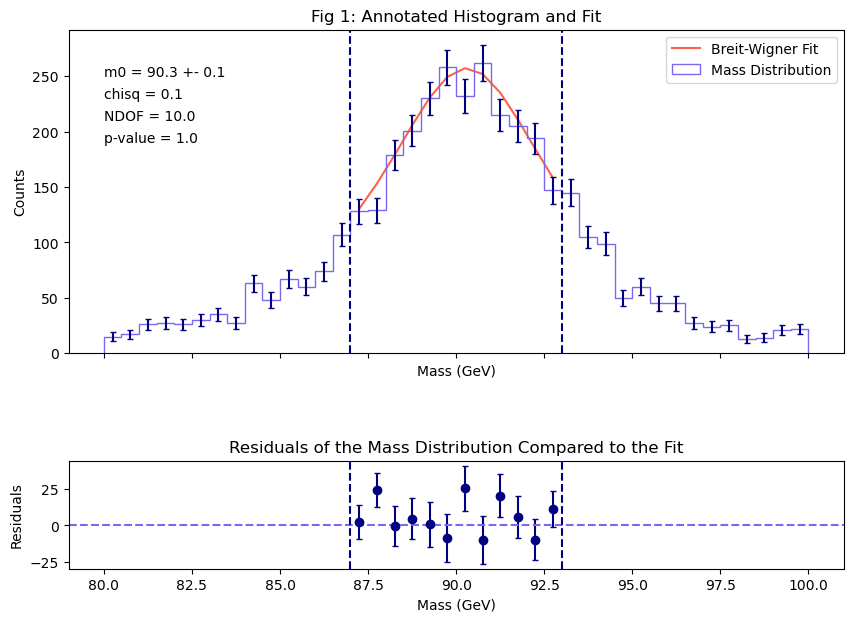

In [55]:
#6 
#recopying old plot
fig2, (ax_top, ax_bot) = plt.subplots(
    2,1, sharex=True, figsize=(10,7),
    gridspec_kw={'height_ratios':[3,1],'hspace':0.5})
ax_top.plot(bin_center_cut, fit_cut, color = 'tomato', label = 'Breit-Wigner Fit')
yvals, bin_edge, other = ax_top.hist(m, bins = bins, histtype = 'step', color='mediumslateblue', label ='Mass Distribution')
ax_top.errorbar(bin_center, yvals, errors, fmt='none', capsize=2, color = 'navy')
ax_top.axvline(87, color='navy', ls='--')
ax_top.axvline(93, color='navy', ls='--')
ax_top.set_xlabel('Mass (GeV)')
ax_top.set_ylabel('Counts')
ax_top.set_title('Fig 1: Annotated Histogram and Fit')
ax_top.legend()
ax_bot.errorbar(bin_center_cut, residuals, yerr=errors_cut, fmt='o', color="navy", capsize = 2)
ax_bot.axhline(0,color="mediumslateblue", ls='--')
ax_bot.axvline(87, color='navy', ls='--')
ax_bot.axvline(93, color='navy', ls='--')
ax_bot.set_xlabel('Mass (GeV)')
ax_bot.set_ylabel('Residuals')
ax_bot.set_title('Residuals of the Mass Distribution Compared to the Fit')

#adding annotations
ax_top.annotate(f"m0 = {m0:.1f} +- {m0_unc:.1f}",
                (80, 250), fontsize = 10)
ax_top.annotate(f"chisq = {chisq:.1f}",
                (80, 230), fontsize = 10)
ax_top.annotate(f"NDOF = {dof:.1f}",
                (80, 210), fontsize = 10)
ax_top.annotate(f"p-value = {p_value:.1f}",
                (80, 190), fontsize = 10)

#saving figure
fig2.savefig('lab_3_fig_1.png')

## 3: 2D Parameter Contours

In [50]:
#1
#defining necessary values
n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
M0 = np.linspace(89,91,n_bins)
Gam = np.linspace(5,8,n_bins)

#creating a mask to scan over
mask2 = (bin_center >= 89) & (bin_center <=91)
xdata = bin_center[mask]
ydata = yvals[mask]
yerrs = errors[mask]

#performing chi-square scan
for i in range(n_bins):
    for j in range(n_bins):
        theory = decay_dist(xdata, M0[i], Gam[j])
        chi2 = np.sum((theory-ydata)**2/yerrs**2)
        chi_map[j,i] = chi2
        
#extracting necessary output from scan
chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min+35)
delta_chi_map = chi_map-chi_min

Text(0.5, 1.0, 'Contour Plot of the Mass Distribution')

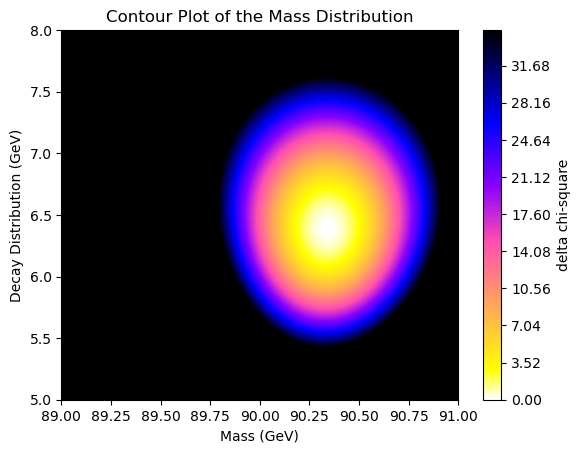

In [42]:
#2 creating a contour plot
levels = [2.30, 9.21]
X, Y = np.meshgrid(M0, Gam)
fig2, ax2 = plt.subplots(1,1)
cs = ax2.contourf(X,Y, delta_chi_map, 500, cmap='gnuplot2_r')
cbar = fig2.colorbar(cs, ax = ax2)
cbar.set_label('delta chi-square')
ax2.set_xlabel('Mass (GeV)')
ax2.set_ylabel('Decay Distribution (GeV)')
ax2.set_title('Contour Plot of the Mass Distribution')

<a list of 2 text.Text objects>

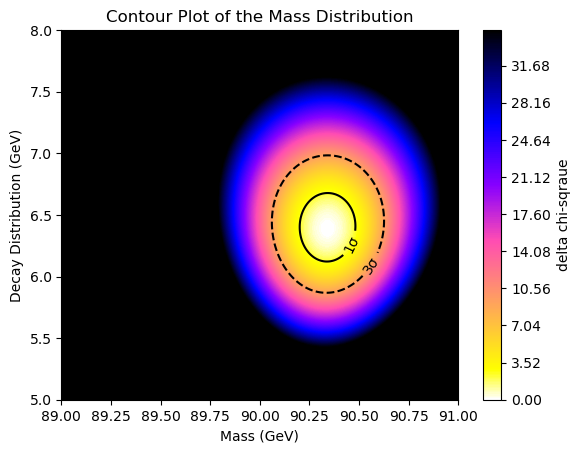

In [43]:
#3 
#replotting old contour plot
levels = [2.30, 9.21]
X, Y = np.meshgrid(M0, Gam)
fig3, ax3 = plt.subplots(1,1)
cs = ax3.contourf(X,Y, delta_chi_map, 500, cmap='gnuplot2_r')
cbar = fig3.colorbar(cs, ax = ax3)
cbar.set_label('delta chi-sqraue')
ax3.set_xlabel('Mass (GeV)')
ax3.set_ylabel('Decay Distribution (GeV)')
ax3.set_title('Contour Plot of the Mass Distribution')

#adding 1 sigma and 3 signma confidence levels
CS = ax3.contour(X, Y, delta_chi_map, levels = levels, colors=['k', 'k'], linestyles=['solid', 'dashed'])

#labeling the contours
fmt = {levels[0]: '1σ', levels[1]: '3σ'}
ax3.clabel(CS, inline=True, fontsize=10, fmt=fmt)

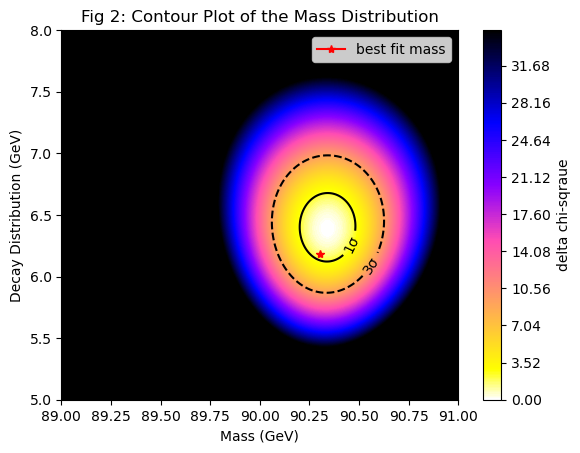

In [56]:
#4
#replotting old stuff
fig4, ax4 = plt.subplots(1,1)
cs = ax4.contourf(X,Y, delta_chi_map, 500, cmap='gnuplot2_r')
cbar = fig4.colorbar(cs, ax = ax4)
cbar.set_label('delta chi-sqraue')
CS = ax4.contour(X, Y, delta_chi_map, levels = levels, colors=['k', 'k'], linestyles=['solid', 'dashed'])
ax4.clabel(CS, inline=True, fontsize=10, fmt=fmt)
ax4.set_xlabel('Mass (GeV)')
ax4.set_ylabel('Decay Distribution (GeV)')
ax4.set_title('Fig 2: Contour Plot of the Mass Distribution')

#adding a dot at the best fit mass
ax4.plot(m0, Gamma, c='r', marker = '*', label = 'best fit mass')
ax4.legend()

#saving figure
fig4.savefig('lab_3_fig_2.png')